In [1]:
from td_utils import load_raw_audio
from mix_audio import create_training_data
from utils import make_dir

import os
import numpy as np
from tqdm import tqdm
import IPython
import matplotlib.pyplot as plt

/Users/m/.pyenv/versions/pytube/lib/python3.5/site-packages/pydub/utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
make_dir('./data/train_audios')
make_dir('./data/XY_train')

audio_dir = os.path.join('.','data','audio_label_clip')
activates, negatives, backgrounds = load_raw_audio(audio_dir)

num_of_data = 100

for i in tqdm(range(num_of_data)):
    j = np.random.randint(0, len(backgrounds))
    x, y = create_training_data(backgrounds[j], 
                               activates, 
                               negatives, 
                               filename='./data/train_audios/mix_{}.wav'.format(i), Ty=1375)
    x = np.transpose(x)
    y = np.transpose(y)
    np.save('./data/XY_train/x_{}'.format(i),x)
    np.save('./data/XY_train/y_{}'.format(i),y)

100%|██████████| 100/100 [00:04<00:00, 20.20it/s]


In [3]:
print(x.shape, y.shape)

(5513, 128) (1375, 1)


In [4]:
IPython.display.Audio("./data/train_audios/mix_{}.wav".format(num_of_data-1))

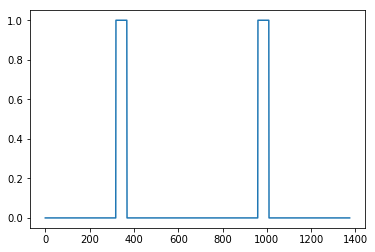

In [5]:
plt.plot(y)